In [1]:
#import MDAnalysis
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import GRO, TPR, PSF, XTC
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=100)
from tqdm.auto import tqdm
import pickle
from MDAnalysis.tests.datafiles import waterPSF, waterDCD
from MDAnalysis.analysis.hydrogenbonds import HydrogenBondAnalysis
# the next line is necessary to display plots in Jupyter
%matplotlib inline

In [2]:
u = mda.Universe("/Users/k20098771/Data/2023/CGtoAA/6z0i_CGtoAA_200us_step6_6.tpr", "/Users/k20098771/Data/2023/CGtoAA/6z0i_CGtoAA_200us_300ns_nojump_center.xtc")
protein = u.select_atoms('protein')
print('There are {} residues in the protein'.format(len(protein.residues)))
#protein residues

There are 112 residues in the protein


In [3]:
# #Trajectory frames
# u_1000 = u.trajectory[::10]
# len(u_1000)
# time=[]
# for ts in tqdm(u_1000):
#     time.append(u.trajectory.time)
# time=np.array(time)
# len(time)

# K26/D16

In [4]:
hbonds_A1 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 1420 1421 1422", 
    acceptors_sel="index 204 205", # D16 "index 196:207 or index 692:703"; T20 index 262:275 or index 758:771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [5]:
hbonds_A1.run(
    start=None,
    stop=None,
    step=None,
    verbose=True
)

  0%|          | 0/6001 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:751: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, index 204 205.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:722: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, None, and Acceptor, index 204 205.
  warnings.warn(


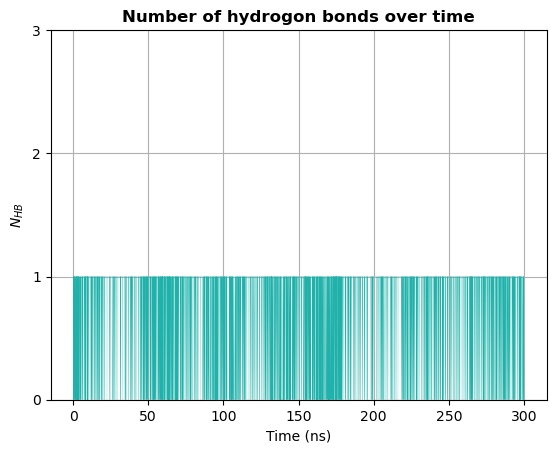

In [6]:
ax = plt.plot(hbonds_A1.times/1000, hbonds_A1.count_by_time(), lw=0.15, color='lightseagreen')

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 4, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 3])  # Adjust the y-axis limits to fit your data

plt.grid(True)  # Adding grid lines for better visualization

plt.show()

In [62]:
hbonds_A1.count_by_time().shape

(6001,)

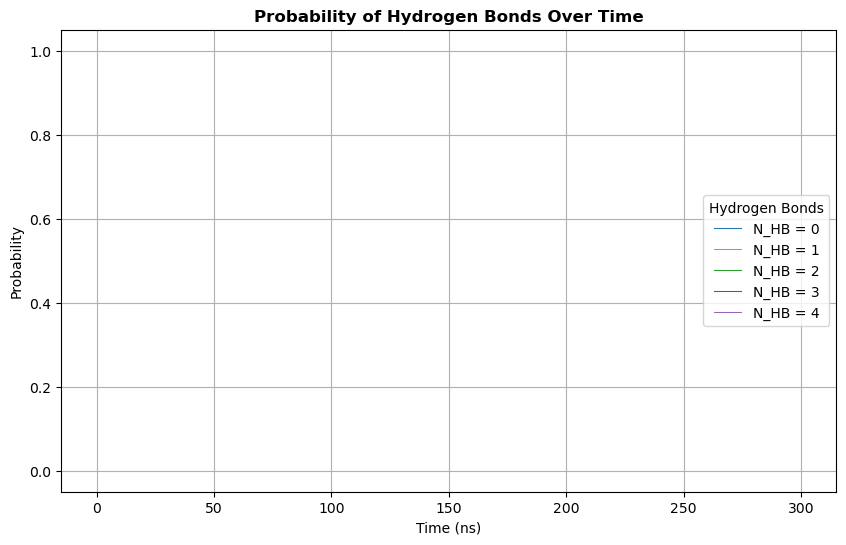

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming hbonds_A1.times and hbonds_A1.count_by_time() are available from your data
times = hbonds_A1.times / 1000  # Convert times to nanoseconds (ns)
counts = hbonds_A1.count_by_time()

# Create a DataFrame to facilitate computation
data = pd.DataFrame({'Time': times, 'Counts': counts})

# Define the possible counts (adjust the range as per your data)
possible_counts = np.arange(0, 5)  # Assuming the count ranges from 0 to 4

# Compute the probabilities for each count
probabilities = pd.DataFrame(index=times)

for count in possible_counts:
    probabilities[count] = (data['Counts'] == count).astype(float)

# Plot the probabilities
plt.figure(figsize=(10, 6))
for count in possible_counts:
    plt.plot(probabilities.index, probabilities[count], label=f'N_HB = {count}', lw=0.75)

plt.title("Probability of Hydrogen Bonds Over Time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel("Probability")

# Adding grid lines for better visualization
plt.grid(True)
plt.legend(title='Hydrogen Bonds')

# Display the plot
plt.show()


In [7]:
hbonds_A1.count_by_ids()

array([[1419, 1420,  205, 1012],
       [1419, 1422,  205,  891],
       [1419, 1421,  204,  863],
       [1419, 1422,  204,  748],
       [1419, 1421,  205,  571],
       [1419, 1420,  204,  474]])

In [8]:
print(hbonds_A1.results.hbonds.shape)

(4559, 6)


In [9]:
hbonds_B1 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 1420 1421 1422",
    acceptors_sel="index 700 701", # D16 "index 196:207 or index 692:703"; T20 index 262:275 or index 758:771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [10]:
hbonds_B1.run(
    start=None,
    stop=None,
    step=None,
    verbose=True
)

  0%|          | 0/6001 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:722: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, None, and Acceptor, index 700 701.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:751: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, index 700 701.
  warnings.warn(


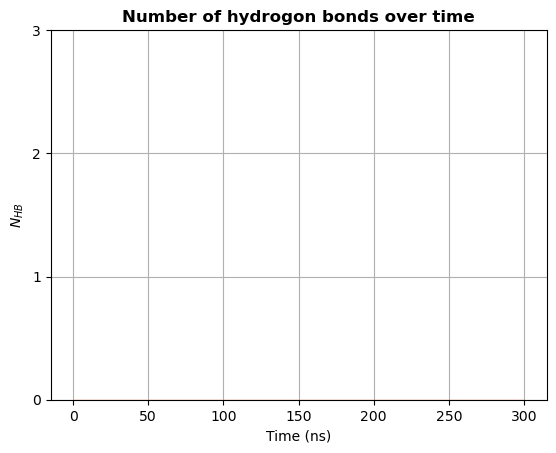

In [11]:
ax = plt.plot(hbonds_B1.times/1000, hbonds_B1.count_by_time(), lw=0.15, color='lightsalmon')

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 4, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 3])  # Adjust the y-axis limits to fit your data

plt.grid(True)  # Adding grid lines for better visualization

plt.show()

In [12]:
hbonds_B1.count_by_ids()

array([], shape=(0, 4), dtype=int64)

In [13]:
print(hbonds_B1.results.hbonds.shape)

(0, 6)


In [14]:
hbonds_AB1 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 1420 1421 1422", 
    acceptors_sel="index 204 205 700 701", # D16 "index 196:207 or index 692:703"; T20 index 262:275 or index 758:771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [15]:
hbonds_AB1.run(
    start=None,
    stop=None,
    step=None,
    verbose=True
)

  0%|          | 0/6001 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:751: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, index 204 205 700 701.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:722: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, None, and Acceptor, index 204 205 700 701.
  warnings.warn(


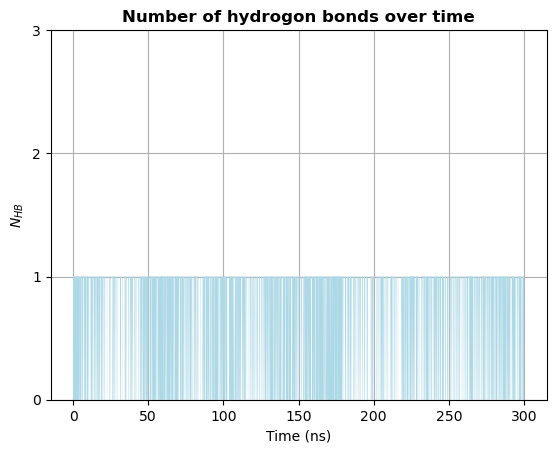

In [16]:
ax = plt.plot(hbonds_AB1.times/1000, hbonds_AB1.count_by_time(), lw=0.15, color='lightblue')

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 4, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 3])  # Adjust the y-axis limits to fit your data

plt.grid(True)  # Adding grid lines for better visualization

plt.show()

In [17]:
hbonds_AB1.count_by_ids()

array([[1419, 1420,  205, 1012],
       [1419, 1422,  205,  891],
       [1419, 1421,  204,  863],
       [1419, 1422,  204,  748],
       [1419, 1421,  205,  571],
       [1419, 1420,  204,  474]])

In [18]:
# Your 2D NumPy array
data = hbonds_AB1.count_by_ids()
# Sort the rows based on the second column (index 1)
sorted_indices = np.argsort(data[:, 2])

# Rank the rows
ranked_data = data[sorted_indices]
# Print the ranked data
print(ranked_data)

[[1419 1421  204  863]
 [1419 1422  204  748]
 [1419 1420  204  474]
 [1419 1420  205 1012]
 [1419 1422  205  891]
 [1419 1421  205  571]]


In [19]:
print(hbonds_AB1.results.hbonds.shape)

(4559, 6)


# K26/T20

In [20]:
hbonds_A2 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 1420 1421 1422", 
    acceptors_sel="index 268", # D16 "index 196:207 or index 692:703"; T20 index 262:275 or index 758:771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [21]:
hbonds_A2.run(
    start=5003,
    stop=5004,
    step=None,
    verbose=True
)

  0%|          | 0/1 [00:00<?, ?it/s]

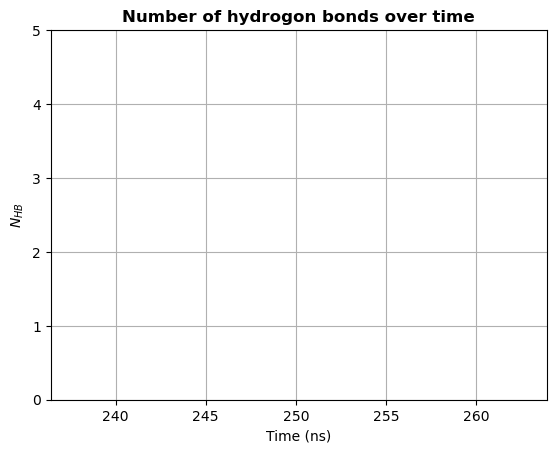

In [22]:
ax = plt.plot(hbonds_A2.times/1000, hbonds_A2.count_by_time(), lw=0.15, color='lightseagreen')

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 6, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 5])  # Adjust the y-axis limits to fit your data

plt.grid(True)  # Adding grid lines for better visualization

plt.show()

In [23]:
hbonds_A2.count_by_ids()

array([[1419, 1420,  268,    1]])

In [24]:
print(hbonds_A2.results.hbonds.shape)

(1, 6)


In [25]:
hbonds_B2 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 1420 1421 1422", 
    acceptors_sel="index 764", # D16 "index 196:207 or index 692:703"; T20 index 262:275 or index 758:771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [26]:
hbonds_B2.run(
    start=None,
    stop=None,
    step=None,
    verbose=True
)

  0%|          | 0/6001 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:751: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, index 764.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:722: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, None, and Acceptor, index 764.
  warnings.warn(


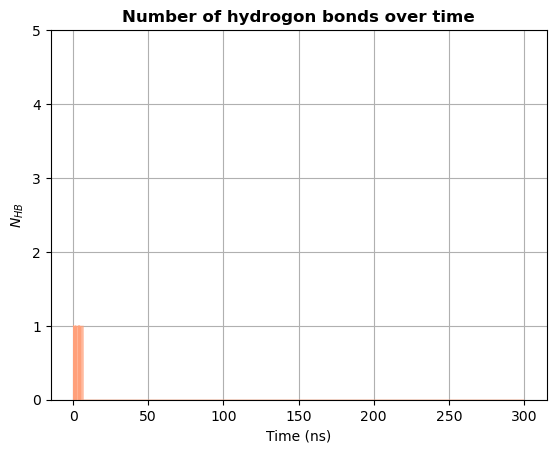

In [27]:
ax = plt.plot(hbonds_B2.times/1000, hbonds_B2.count_by_time(), lw=0.25, color='lightsalmon')

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 6, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 5])  # Adjust the y-axis limits to fit your data

plt.grid(True)  # Adding grid lines for better visualization

plt.show()

In [28]:
hbonds_B2.count_by_ids()

array([[1419, 1421,  764,   15],
       [1419, 1420,  764,   10],
       [1419, 1422,  764,    6]])

In [29]:
print(hbonds_B2.results.hbonds.shape)

(31, 6)


In [30]:
hbonds_AB2 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 1420 1421 1422", 
    acceptors_sel="index 268 764", # D16 "index 196:207 or index 692:703"; T20 index 262:275 or index 758:771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [31]:
hbonds_AB2.run(
    start=None,
    stop=None,
    step=None,
    verbose=True
)

  0%|          | 0/6001 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:751: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, index 268 764.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:722: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, None, and Acceptor, index 268 764.
  warnings.warn(


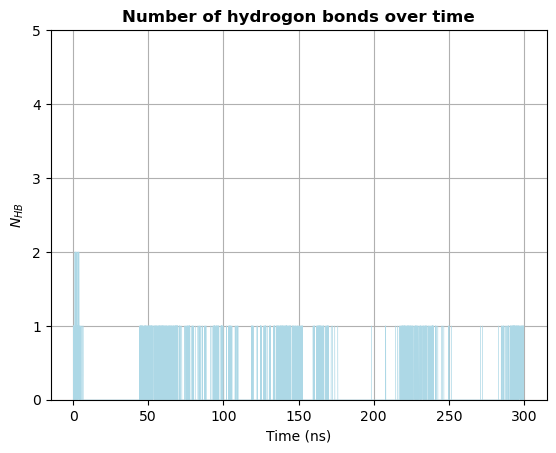

In [32]:
ax = plt.plot(hbonds_AB2.times/1000, hbonds_AB2.count_by_time(), lw=0.25, color='lightblue')

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 6, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 5])  # Adjust the y-axis limits to fit your data

plt.grid(True)  # Adding grid lines for better visualization

plt.show()

In [33]:
hbonds_AB2.count_by_ids()

array([[1419, 1421,  268,  330],
       [1419, 1420,  268,  301],
       [1419, 1422,  268,  275],
       [1419, 1421,  764,   15],
       [1419, 1420,  764,   10],
       [1419, 1422,  764,    6]])

In [34]:
# Your 2D NumPy array
data = hbonds_AB2.count_by_ids()
# Sort the rows based on the second column (index 1)
sorted_indices = np.argsort(data[:, 2])

# Rank the rows
ranked_data = data[sorted_indices]
# Print the ranked data
print(ranked_data)

[[1419 1421  268  330]
 [1419 1420  268  301]
 [1419 1422  268  275]
 [1419 1421  764   15]
 [1419 1420  764   10]
 [1419 1422  764    6]]


In [35]:
print(hbonds_AB2.results.hbonds.shape)

(937, 6)


# W34/T20

In [36]:
hbonds_A3 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 1534", 
    acceptors_sel="index 268 275", # D16 "index 196:207 or index 692:703"; T20 index 262:275 or index 758:771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [37]:
hbonds_A3.run(
    start=None,
    stop=None,
    step=None,
    verbose=True
)

  0%|          | 0/6001 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:722: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, None, and Acceptor, index 268 275.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:751: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, index 268 275.
  warnings.warn(


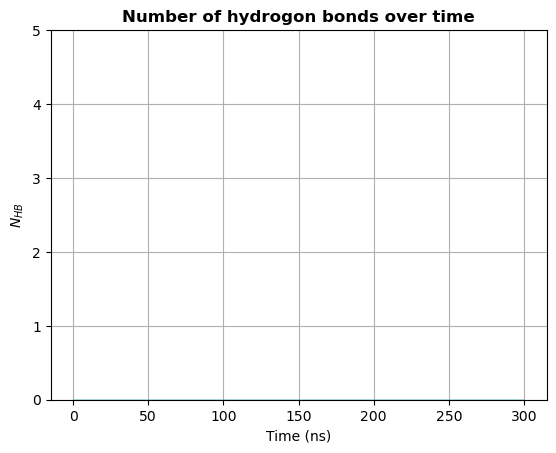

In [38]:
ax = plt.plot(hbonds_A3.times/1000, hbonds_A3.count_by_time(), lw=0.25, color='lightseagreen')

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 6, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 5])  # Adjust the y-axis limits to fit your data

plt.grid(True)  # Adding grid lines for better visualization

plt.show()

In [39]:
hbonds_A3.count_by_ids()

array([], shape=(0, 4), dtype=int64)

In [40]:
print(hbonds_A3.results.hbonds.shape)

(0, 6)


In [41]:
print(hbonds_A3.results.hbonds[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [42]:
hbonds_B3 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 1534", 
    acceptors_sel="index 764 771", # D16 "index 196:207 or index 692:703"; T20 index 262:275 or index 758:771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [43]:
hbonds_B3.run(
    start=None,
    stop=None,
    step=None,
    verbose=True
)

  0%|          | 0/6001 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:722: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, None, and Acceptor, index 764 771.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:751: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, index 764 771.
  warnings.warn(


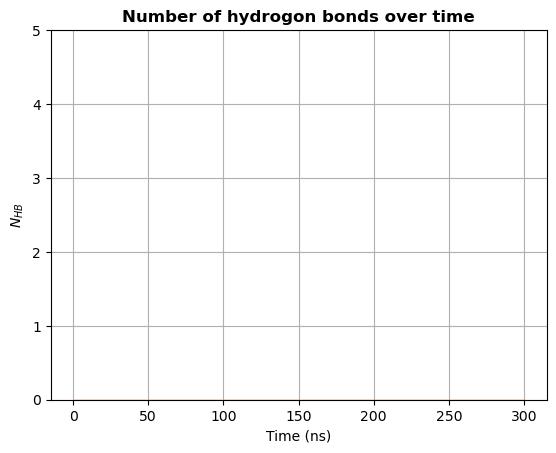

In [44]:
ax = plt.plot(hbonds_B3.times/1000, hbonds_B3.count_by_time(), lw=0.25, color='lightsalmon')

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 6, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 5])  # Adjust the y-axis limits to fit your data

plt.grid(True)  # Adding grid lines for better visualization

plt.show()

In [45]:
hbonds_B3.count_by_ids()

array([], shape=(0, 4), dtype=int64)

In [46]:
print(hbonds_B3.results.hbonds.shape)

(0, 6)


In [47]:
hbonds_AB3 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 1534", 
    acceptors_sel="index 268 764 275 771", # D16 "index 196:207 or index 692:703"; T20 index 262:275 or index 758:771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [48]:
hbonds_AB3.run(
    start=None,
    stop=None,
    step=None,
    verbose=True
)

  0%|          | 0/6001 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:722: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, None, and Acceptor, index 268 764 275 771.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:751: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, index 268 764 275 771.
  warnings.warn(


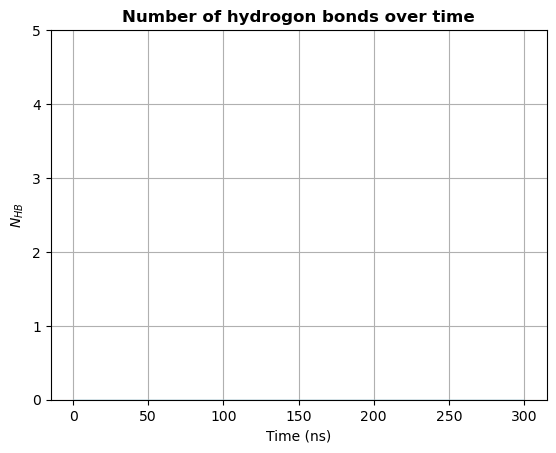

In [49]:
ax = plt.plot(hbonds_AB3.times/1000, hbonds_AB3.count_by_time(), lw=0.25, color='lightblue')

plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel(r"$N_{HB}$")

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 6, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 5])  # Adjust the y-axis limits to fit your data

plt.grid(True)  # Adding grid lines for better visualization

plt.show()

In [50]:
hbonds_AB3.count_by_ids()

array([], shape=(0, 4), dtype=int64)

In [51]:
# Your 2D NumPy array
data = hbonds_AB3.count_by_ids()
# Sort the rows based on the second column (index 1)
sorted_indices = np.argsort(data[:, 2])

# Rank the rows
ranked_data = data[sorted_indices]
# Print the ranked data
print(ranked_data)

[]


In [52]:
print(hbonds_AB3.results.hbonds.shape)

(0, 6)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


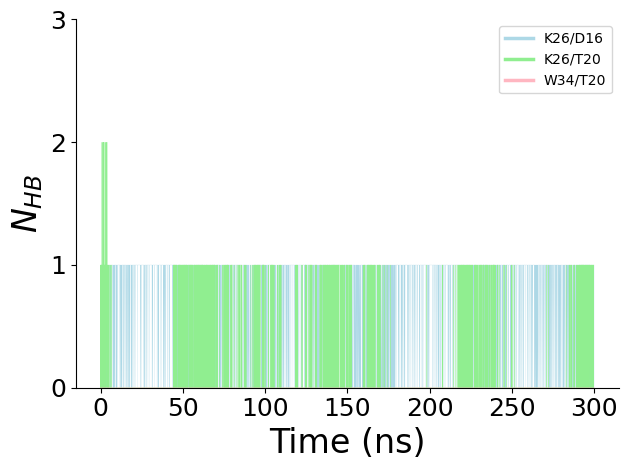

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the first set of data
plt.plot(hbonds_AB1.times/1000, hbonds_AB1.count_by_time(), lw=0.15, color='lightblue', label='K26/D16')

# Plot the second set of data on the same plot
plt.plot(hbonds_AB2.times/1000, hbonds_AB2.count_by_time(), lw=0.25, color='lightgreen', label='K26/T20')

plt.plot(hbonds_AB3.times/1000, hbonds_AB3.count_by_time(), lw=0.25, color='lightpink', label='W34/T20')

# Set the plot title and axis labels
# plt.title("Number of hydrogen bonds over time", weight="bold")
plt.xlabel("Time (ns)", fontsize=24)
plt.ylabel(r"$N_{HB}$", fontsize=24)

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 4, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

# Adjust the y-axis limits to fit your data
plt.ylim([0, 3])

# Increase the font size for x-axis ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding grid lines for better visualization
# plt.grid(True)



# Adding a legend to differentiate between the two sets of data
plt.legend()
leg = plt.legend()
for i in leg.legend_handles:
    i.set_linewidth(2.5)
ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines

plt.tight_layout()

plt.savefig("/Users/k20098771/Data/Figures/6z0i_figure5_01.eps",dpi=800, format='eps')

# Show the plot with both sets of data
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


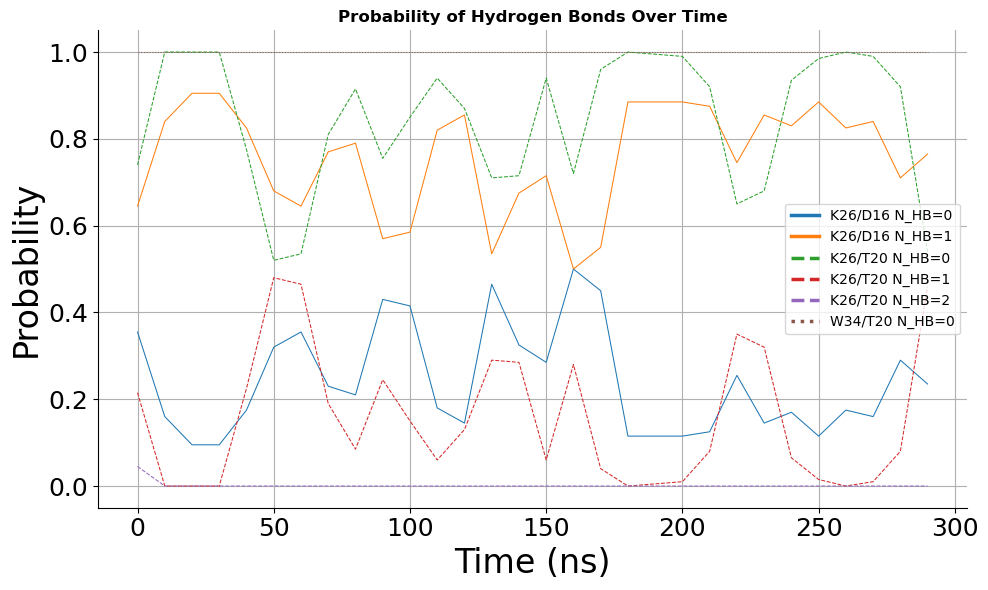

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to bin the data and calculate probabilities
def calculate_probabilities(times, counts, bin_size):
    bins = np.arange(0, max(times) + bin_size, bin_size)
    binned_counts = pd.cut(times, bins, right=False)
    probability_data = pd.DataFrame({'Counts': counts, 'Bin': binned_counts})
    
    probability_distribution = (probability_data.groupby(['Bin', 'Counts'])
                                .size()
                                .unstack(fill_value=0)
                                .apply(lambda x: x / x.sum(), axis=1)
                                .fillna(0))
    
    return bins[:-1], probability_distribution

# Parameters
bin_size = 10  # Bin size in ns

# Convert time to ns
times_1 = hbonds_AB1.times / 1000
counts_1 = hbonds_AB1.count_by_time()
times_2 = hbonds_AB2.times / 1000
counts_2 = hbonds_AB2.count_by_time()
times_3 = hbonds_AB3.times / 1000
counts_3 = hbonds_AB3.count_by_time()

# Calculate probabilities for each dataset
bins_1, prob_1 = calculate_probabilities(times_1, counts_1, bin_size)
bins_2, prob_2 = calculate_probabilities(times_2, counts_2, bin_size)
bins_3, prob_3 = calculate_probabilities(times_3, counts_3, bin_size)

# Plot the probabilities
plt.figure(figsize=(10, 6))

for count in prob_1.columns:
    plt.plot(bins_1, prob_1[count], label=f'K26/D16 N_HB={count}', lw=0.75)

for count in prob_2.columns:
    plt.plot(bins_2, prob_2[count], label=f'K26/T20 N_HB={count}', linestyle='--', lw=0.75)

for count in prob_3.columns:
    plt.plot(bins_3, prob_3[count], label=f'W34/T20 N_HB={count}', linestyle=':', lw=0.75)

# Set the plot title and axis labels
plt.title("Probability of Hydrogen Bonds Over Time", weight="bold")
plt.xlabel("Time (ns)", fontsize=24)
plt.ylabel("Probability", fontsize=24)

# Adjusting the y-axis ticks
plt.yticks(fontsize=18)

# Increase the font size for x-axis ticks
plt.xticks(fontsize=18)

# Adding grid lines for better visualization
plt.grid(True)

# Adding a legend to differentiate between the sets of data
plt.legend()
leg = plt.legend()
for i in leg.legend_handles:
    i.set_linewidth(2.5)
ax = plt.gca()  # Get current axis
ax.spines["right"].set_color("none")  # Make right spine invisible
ax.spines["top"].set_color("none")  # Make top spine invisible

plt.tight_layout()

# Save the plot
plt.savefig("/Users/k20098771/Data/Figures/6z0i_figure5_01.eps", dpi=800, format='eps')

# Show the plot with both sets of data
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


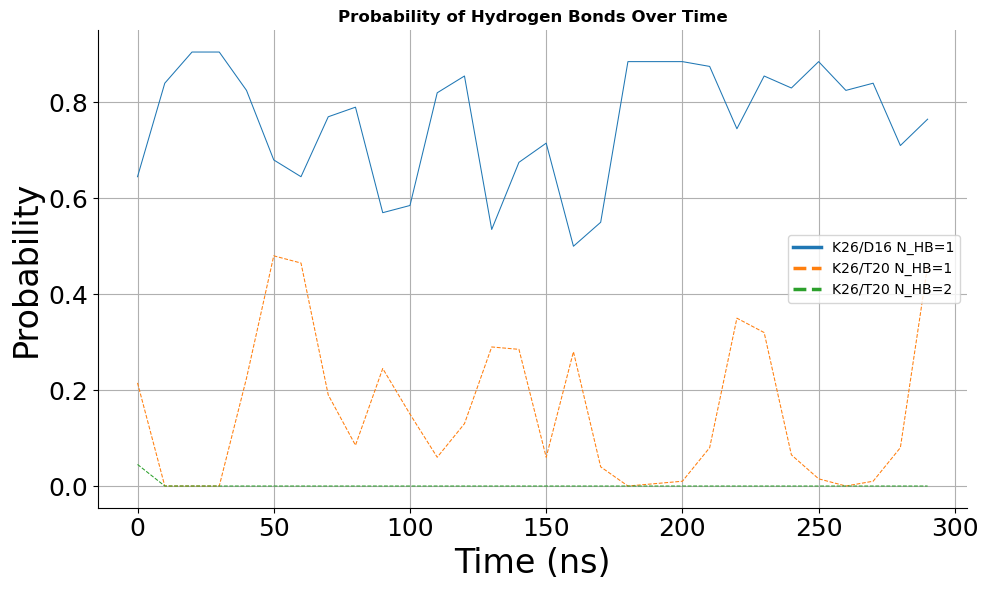

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def calculate_probabilities(times, counts, bin_size):
    bins = np.arange(0, max(times) + bin_size, bin_size)
    binned_counts = pd.cut(times, bins, right=False)
    probability_data = pd.DataFrame({'Counts': counts, 'Bin': binned_counts})
    
    probability_distribution = (probability_data.groupby(['Bin', 'Counts'])
                                .size()
                                .unstack(fill_value=0)
                                .apply(lambda x: x / x.sum(), axis=1)
                                .fillna(0))
    
    return bins[:-1], probability_distribution

# Parameters
bin_size = 10  # Bin size in ns

# Convert time to ns
times_1 = hbonds_AB1.times / 1000
counts_1 = hbonds_AB1.count_by_time()
times_2 = hbonds_AB2.times / 1000
counts_2 = hbonds_AB2.count_by_time()
times_3 = hbonds_AB3.times / 1000
counts_3 = hbonds_AB3.count_by_time()

# Calculate probabilities for each dataset
bins_1, prob_1 = calculate_probabilities(times_1, counts_1, bin_size)
bins_2, prob_2 = calculate_probabilities(times_2, counts_2, bin_size)
bins_3, prob_3 = calculate_probabilities(times_3, counts_3, bin_size)

# Plot the probabilities
plt.figure(figsize=(10, 6))

# Plot for the first dataset
for count in prob_1.columns:
    if count != 0:
        plt.plot(bins_1, prob_1[count], lw=0.75, label=f'K26/D16 N_HB={count}')

# Plot for the second dataset
for count in prob_2.columns:
    if count != 0:
        plt.plot(bins_2, prob_2[count], lw=0.75, label=f'K26/T20 N_HB={count}', linestyle='--')

# Plot for the third dataset
for count in prob_3.columns:
    if count != 0:
        plt.plot(bins_3, prob_3[count], lw=0.75, label=f'W34/T20 N_HB={count}', linestyle=':')

# Set the plot title and axis labels
plt.title("Probability of Hydrogen Bonds Over Time", weight="bold")
plt.xlabel("Time (ns)", fontsize=24)
plt.ylabel("Probability", fontsize=24)

# Adjusting the y-axis ticks
plt.yticks(fontsize=18)

# Increase the font size for x-axis ticks
plt.xticks(fontsize=18)

# Adding grid lines for better visualization
plt.grid(True)

# Adding a legend to differentiate between the sets of data
plt.legend()
leg = plt.legend()
for i in leg.legend_handles:
    i.set_linewidth(2.5)
ax = plt.gca()  # Get current axis
ax.spines["right"].set_color("none")  # Make right spine invisible
ax.spines["top"].set_color("none")  # Make top spine invisible

plt.tight_layout()

# Save the plot
plt.savefig("/Users/k20098771/Data/Figures/6z0i_figure5_01.eps", dpi=800, format='eps')

# Show the plot with both sets of data
plt.show()


In [54]:
hbonds_AB4 = HydrogenBondAnalysis(
    universe=u,
    donors_sel=None,  #K26 index 1403:1424; W34 index 1523:1546
    hydrogens_sel="index 1420 1421 1422 1534", 
    acceptors_sel="index 204 205 700 701 268 764 275 771", #O 275 771
    d_a_cutoff=3.0,
    d_h_a_angle_cutoff=150,
    update_selections=True
)

In [55]:
hbonds_AB4.run(
    start=None,
    stop=None,
    step=None,
    verbose=True
)

  0%|          | 0/6001 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:751: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, index 204 205 700 701 268 764 275 771.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:722: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, None, and Acceptor, index 204 205 700 701 268 764 275 771.
  warnings.warn(


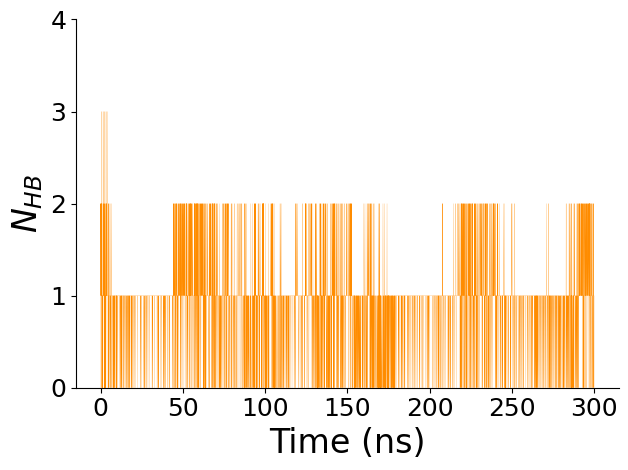

In [56]:
ax = plt.plot(hbonds_AB4.times/1000, hbonds_AB4.count_by_time(), lw=0.15, color='darkorange')

# plt.title("Number of hydrogon bonds over time", weight="bold")
plt.xlabel("Time (ns)", fontsize=24)
plt.ylabel(r"$N_{HB}$", fontsize=24)

# Adjusting the y-axis ticks
y_ticks = np.arange(0, 6, 1)  # Adjust the range to fit your data
plt.yticks(y_ticks)

plt.ylim([0, 4])  # Adjust the y-axis limits to fit your data

# plt.grid(True)  # Adding grid lines for better visualization

# Increase the font size for x-axis ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines

plt.tight_layout()

plt.savefig("/Users/k20098771/Data/Figures/6z0i_figure5_02.eps",dpi=800, format='eps')

plt.show()

In [57]:
hbonds_AB4.count_by_ids()

array([[1419, 1420,  205, 1012],
       [1419, 1422,  205,  891],
       [1419, 1421,  204,  863],
       [1419, 1422,  204,  748],
       [1419, 1421,  205,  571],
       [1419, 1420,  204,  474],
       [1419, 1421,  268,  330],
       [1419, 1420,  268,  301],
       [1419, 1422,  268,  275],
       [1419, 1421,  764,   15],
       [1419, 1420,  764,   10],
       [1419, 1422,  764,    6]])

In [58]:
# Your 2D NumPy array
data = hbonds_AB4.count_by_ids()
# Sort the rows based on the second column (index 1)
sorted_indices = np.argsort(data[:, 2])

# Rank the rows
ranked_data = data[sorted_indices]
# Print the ranked data
print(ranked_data)

[[1419 1421  204  863]
 [1419 1422  204  748]
 [1419 1420  204  474]
 [1419 1420  205 1012]
 [1419 1422  205  891]
 [1419 1421  205  571]
 [1419 1421  268  330]
 [1419 1420  268  301]
 [1419 1422  268  275]
 [1419 1421  764   15]
 [1419 1420  764   10]
 [1419 1422  764    6]]


In [59]:
print(hbonds_AB4.results.hbonds.shape)

(5496, 6)
